# Airline Customers Satisfaction Detection

## Define and formulate your problem as a data mining task 

## Exploratory data analysis 

In [1]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import scikitplot as skplt
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import random



# Loading And previzualzing Data

In [2]:
# Specify the file path
file_path = "C:/Users/dell/Downloads/Projet DM 2/Airline Quality Ratings.csv"

# Get the total number of rows in the file
total_rows = sum(1 for line in open(file_path))

# Specify the number of rows to read
nRowsRead = 200

# Calculate the number of rows to skip
skip_rows = sorted(random.sample(range(1, total_rows + 1), total_rows - nRowsRead))

# Read the CSV file, skipping the randomly selected rows
df = pd.read_csv(file_path, skiprows=skip_rows)
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,64,Male,56,Returning,Business,Business,173,0,3,1,...,3,4,4,5,5,3,1,3,5,Satisfied
1,405,Male,59,Returning,Business,Business,309,48,55,2,...,3,2,3,4,3,3,3,3,3,Neutral or Dissatisfied
2,703,Male,50,First-time,Business,Business,134,15,43,2,...,5,4,5,4,4,4,2,4,4,Neutral or Dissatisfied
3,2924,Male,45,Returning,Business,Business,806,0,20,5,...,4,5,4,5,2,4,5,4,4,Satisfied
4,3147,Female,28,First-time,Business,Business,140,0,0,4,...,3,3,3,1,1,4,4,1,5,Satisfied


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   ID                                      200 non-null    int64 
 1   Gender                                  200 non-null    object
 2   Age                                     200 non-null    int64 
 3   Customer Type                           200 non-null    object
 4   Type of Travel                          200 non-null    object
 5   Class                                   200 non-null    object
 6   Flight Distance                         200 non-null    int64 
 7   Departure Delay                         200 non-null    int64 
 8   Arrival Delay                           200 non-null    int64 
 9   Departure and Arrival Time Convenience  200 non-null    int64 
 10  Ease of Online Booking                  200 non-null    int64 
 11  Check-

In [4]:
df.shape

(200, 24)

In [5]:
df.tail()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
195,126419,Male,57,Returning,Business,Business,2134,0,0,5,...,4,4,4,3,3,4,5,4,4,Satisfied
196,126888,Male,56,Returning,Personal,Economy,2125,0,2,1,...,1,3,5,3,3,2,3,3,2,Neutral or Dissatisfied
197,127421,Female,70,Returning,Personal,Economy,868,0,0,5,...,3,1,4,2,1,3,4,3,3,Satisfied
198,127504,Male,40,Returning,Personal,Economy,1814,0,0,3,...,1,5,4,5,5,3,4,5,3,Satisfied
199,128743,Male,52,Returning,Business,Business,2402,0,23,1,...,2,2,3,2,2,3,1,3,5,Satisfied


In [6]:
df = df.drop(columns=['ID'])

# Identification des variables numeriques vs categoriels

In [7]:
# Définir des listes pour stocker les noms des variables numériques et catégorielles
variables_numeriques = []
variables_categorielles = []

# Identifier le type de chaque variable et son rôle
for column in df.columns:
    column_type = df[column].dtype  # Obtenir le type de données de la colonne
    role = "input"  # Par défaut, considérez toutes les colonnes comme des variables d'entrée
    if column == "Satisfaction": 
        role = "output"  
    if column_type == "object":  # Si le type de données est "object", c'est une variable catégorielle
        variables_categorielles.append(column)
    else:  # Sinon, c'est une variable numérique
        variables_numeriques.append(column)
    print(f"Variable: {column}, Type: {column_type}, Role: {role}")

# Afficher les listes de variables numériques et catégorielles
print("Variables numériques:", variables_numeriques)
print("Variables catégorielles:", variables_categorielles)

Variable: Gender, Type: object, Role: input
Variable: Age, Type: int64, Role: input
Variable: Customer Type, Type: object, Role: input
Variable: Type of Travel, Type: object, Role: input
Variable: Class, Type: object, Role: input
Variable: Flight Distance, Type: int64, Role: input
Variable: Departure Delay, Type: int64, Role: input
Variable: Arrival Delay, Type: int64, Role: input
Variable: Departure and Arrival Time Convenience, Type: int64, Role: input
Variable: Ease of Online Booking, Type: int64, Role: input
Variable: Check-in Service, Type: int64, Role: input
Variable: Online Boarding, Type: int64, Role: input
Variable: Gate Location, Type: int64, Role: input
Variable: On-board Service, Type: int64, Role: input
Variable: Seat Comfort, Type: int64, Role: input
Variable: Leg Room Service, Type: int64, Role: input
Variable: Cleanliness, Type: int64, Role: input
Variable: Food and Drink, Type: int64, Role: input
Variable: In-flight Service, Type: int64, Role: input
Variable: In-flight

#  Statistics over each numerical attribute

In [8]:
#Les variables numerique 
df.describe()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,38.580000,1177.125000,13.730000,14.995000,3.065000,2.830000,3.185000,3.285000,2.95000,3.165000,3.445000,3.440000,3.420000,3.325000,3.590000,2.850000,3.415000,3.580000
std,15.609996,1015.582086,29.287813,30.185273,1.540337,1.421691,1.215798,1.397692,1.28286,1.332913,1.321251,1.321032,1.281331,1.381637,1.112695,1.373657,1.357197,1.216965
min,8.000000,77.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,26.750000,377.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,39.000000,807.000000,0.000000,0.500000,3.000000,3.000000,3.000000,4.000000,3.00000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000
75%,50.250000,1692.000000,14.000000,14.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.250000,5.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.250000
max,74.000000,3901.000000,200.000000,185.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Univariate Analysis

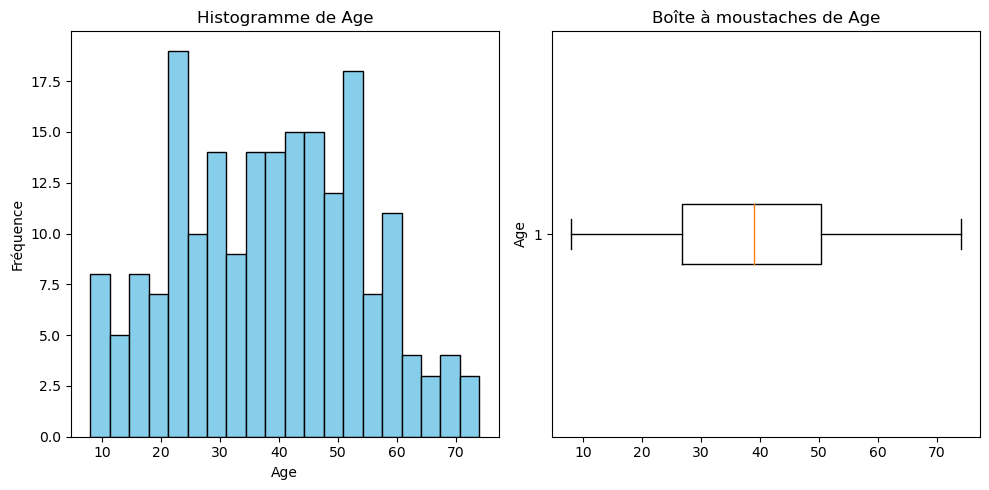

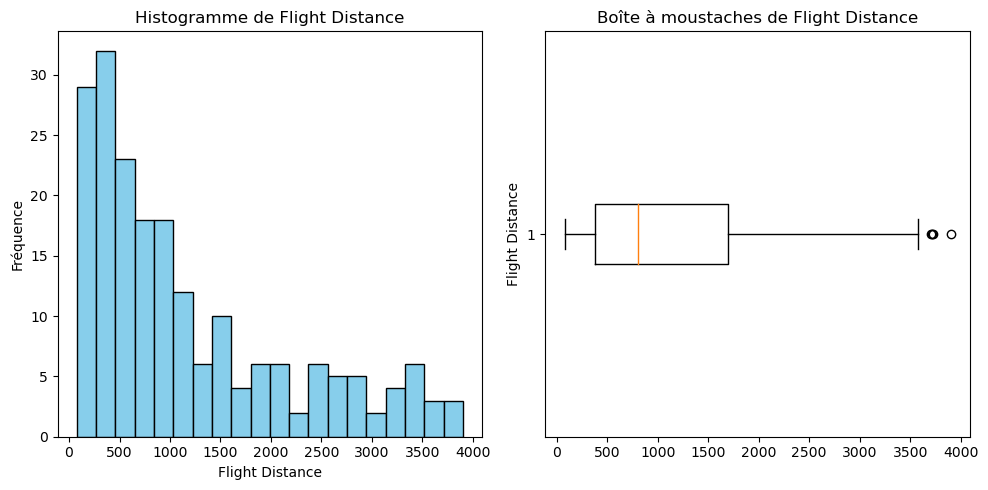

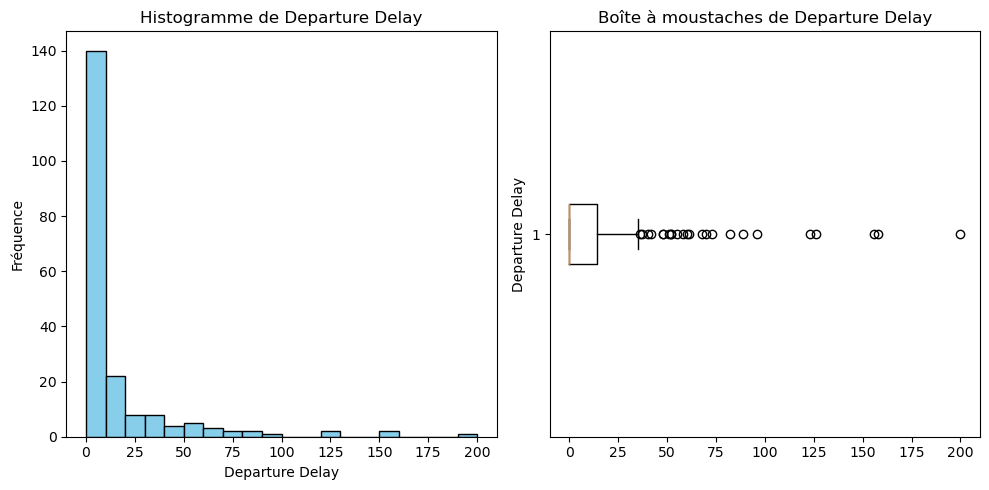

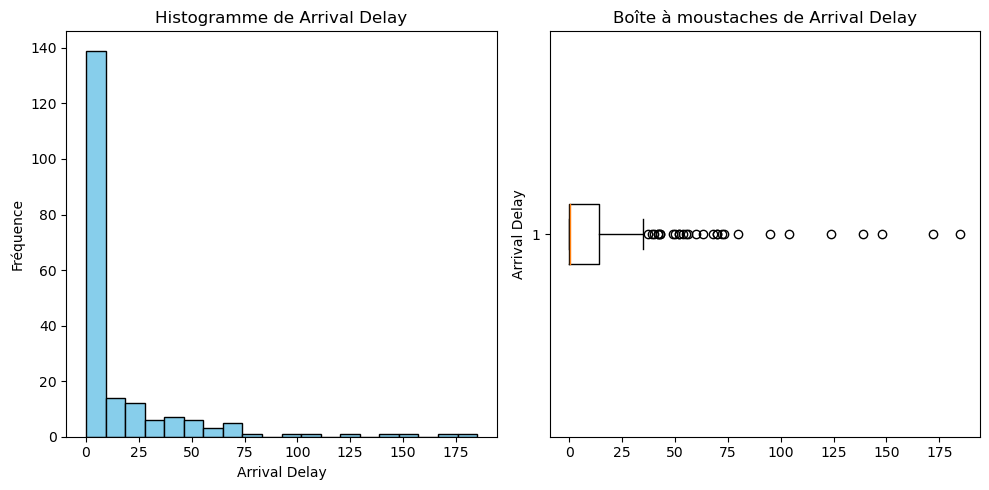

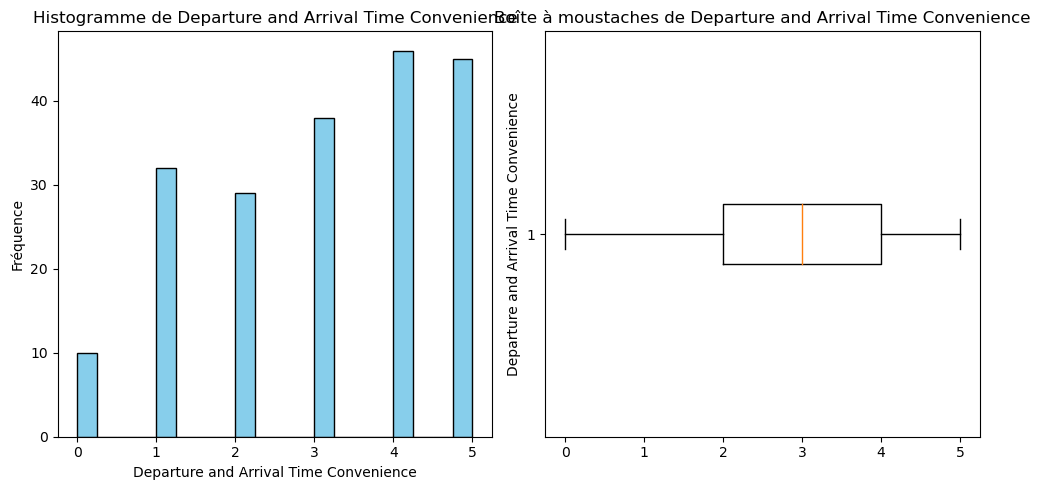

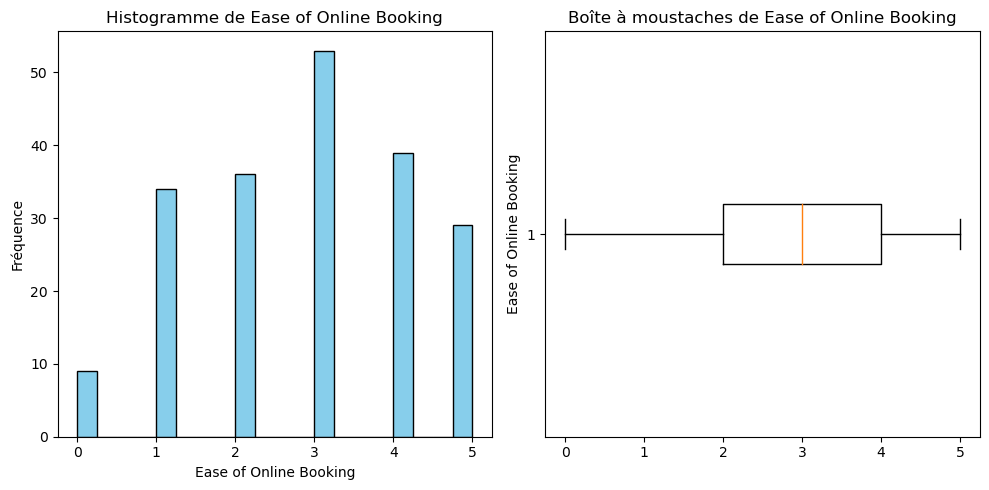

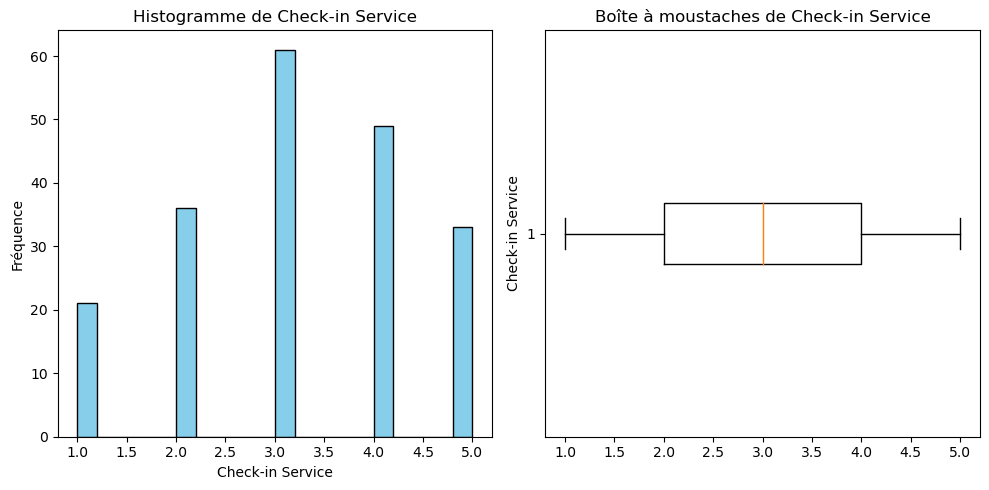

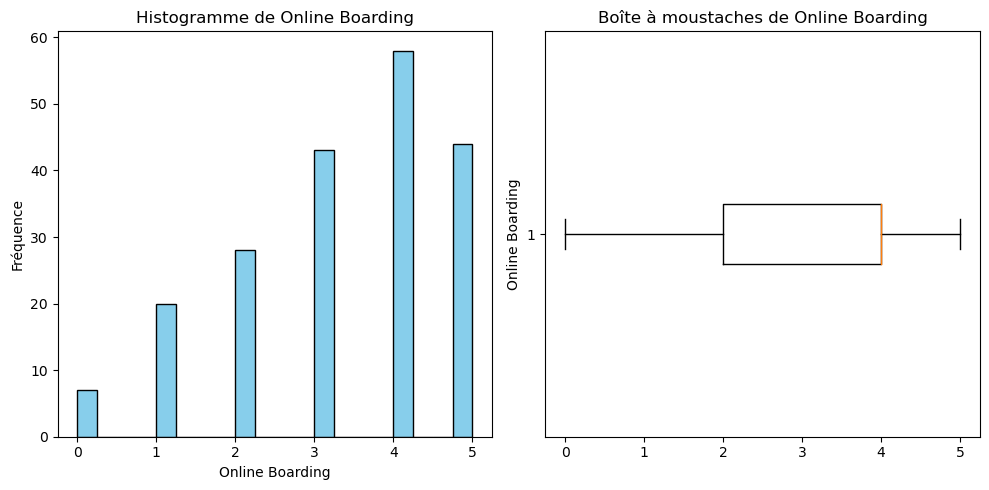

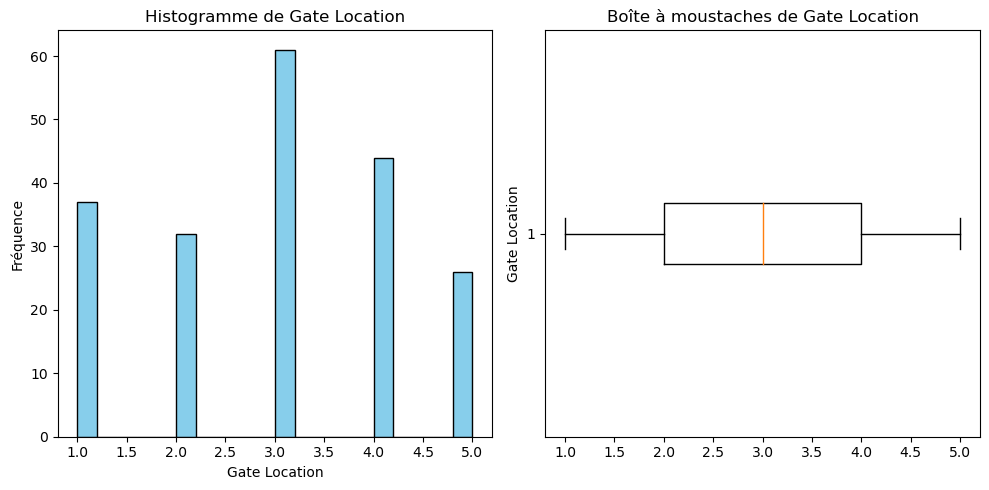

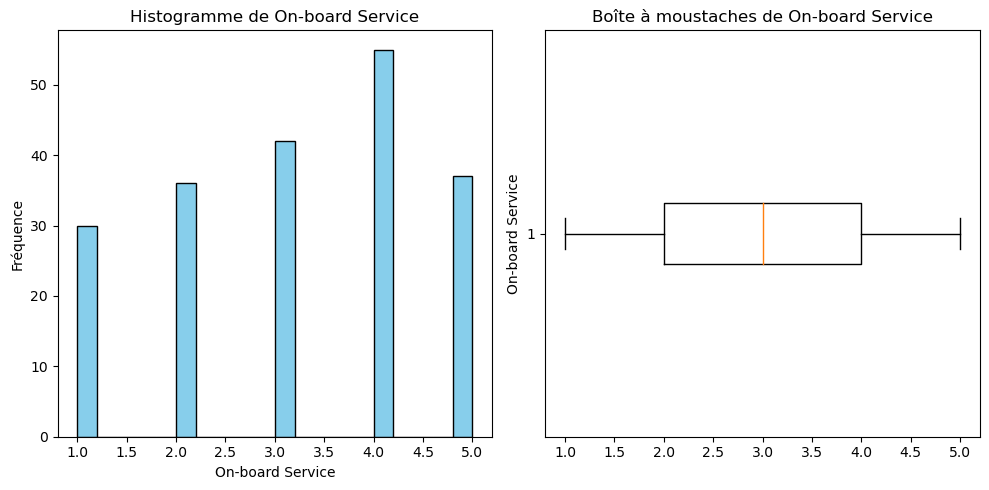

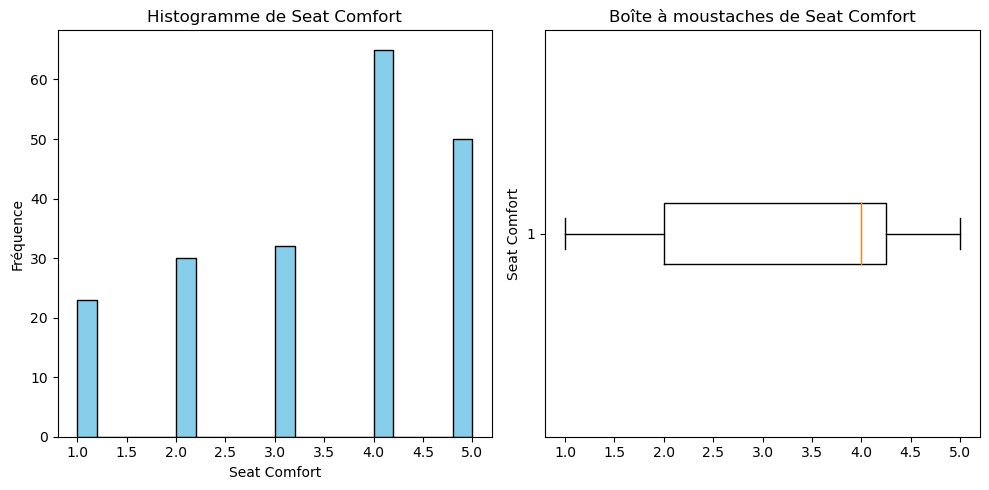

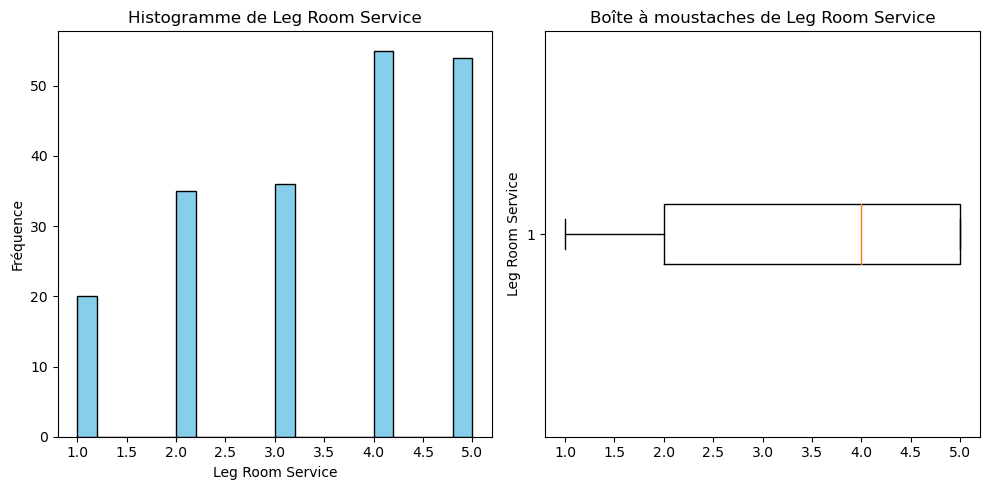

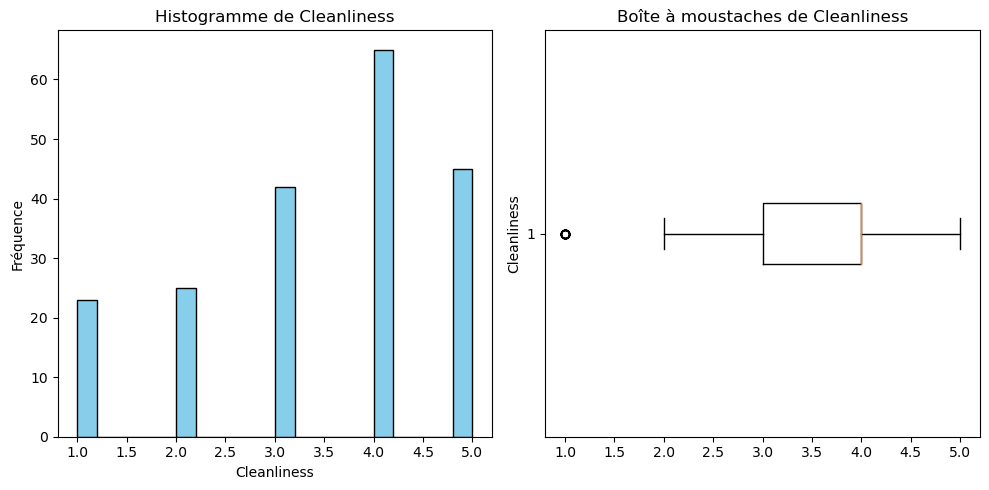

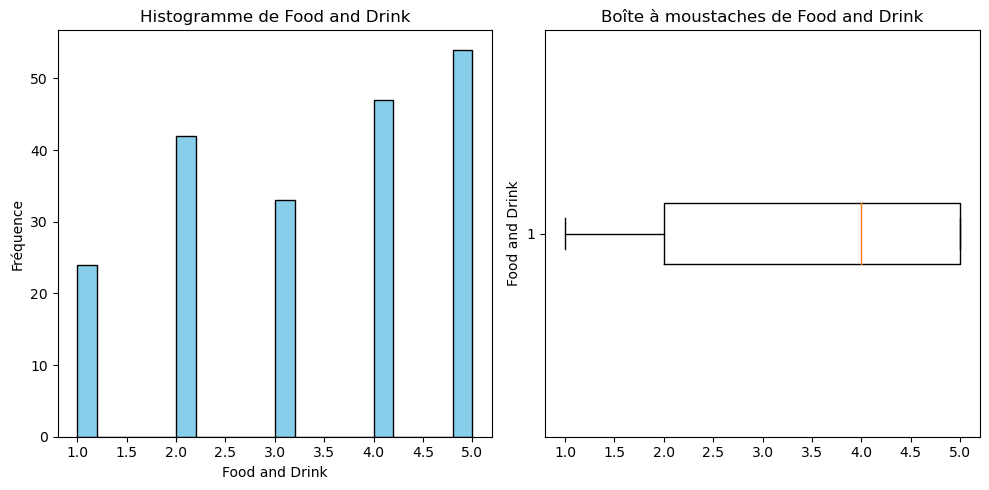

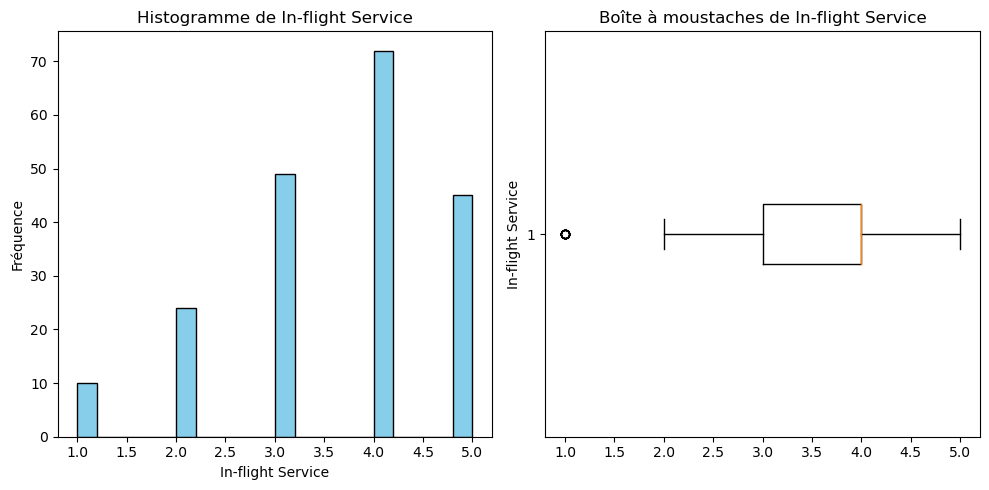

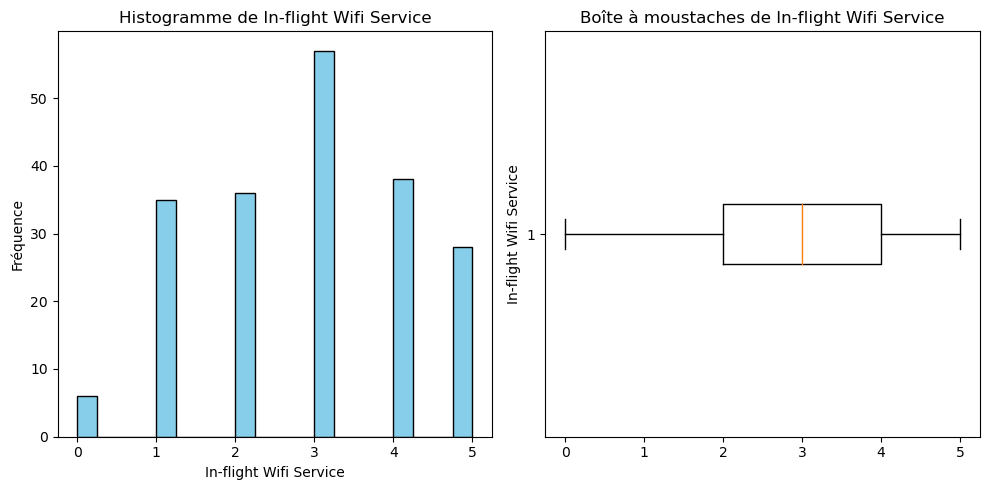

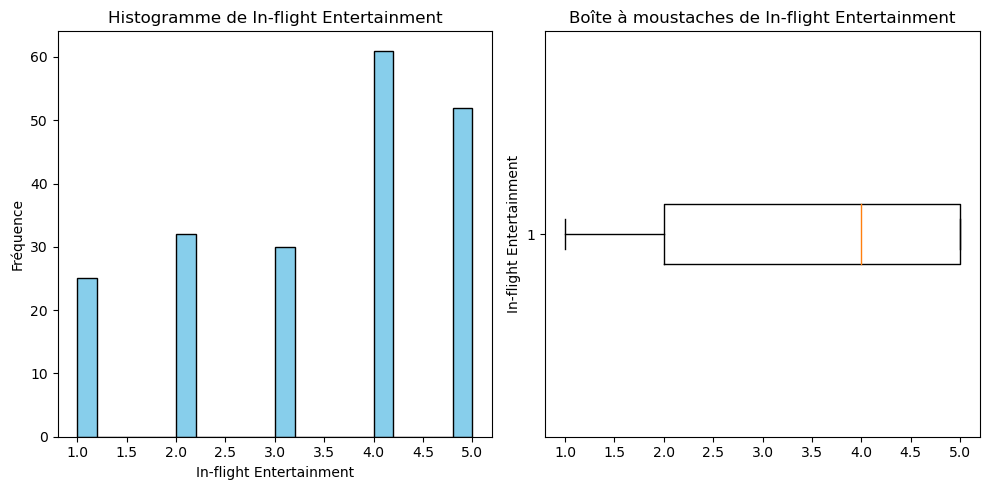

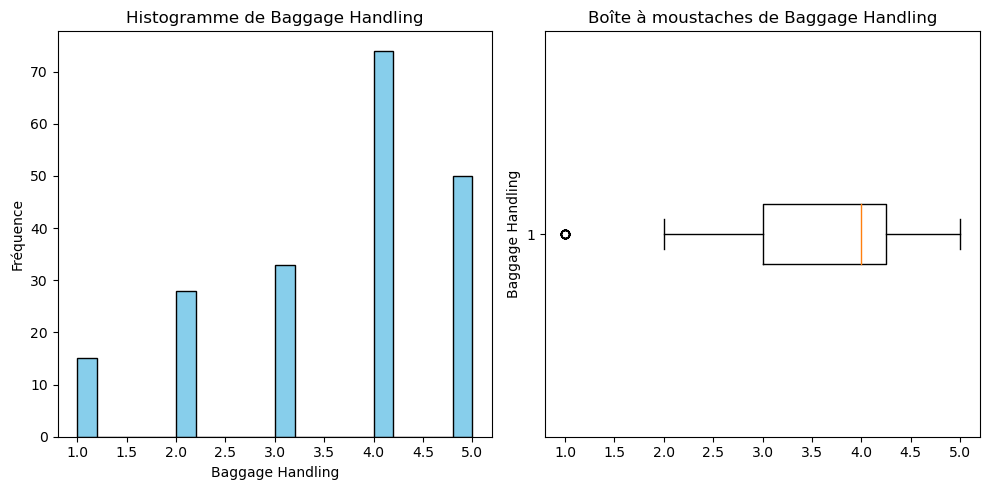

In [9]:
# Créer des histogrammes et des boîtes à moustaches pour chaque variable numérique
for column in variables_numeriques:
    # Créer un histogramme
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogramme de {column}')
    plt.xlabel(column)
    plt.ylabel('Fréquence')

    # Créer une boîte à moustaches
    plt.subplot(1, 2, 2)
    plt.boxplot(df[column], vert=False)
    plt.title(f'Boîte à moustaches de {column}')
    plt.ylabel(column)
    
    # Afficher les figures
    plt.tight_layout()
    plt.show()

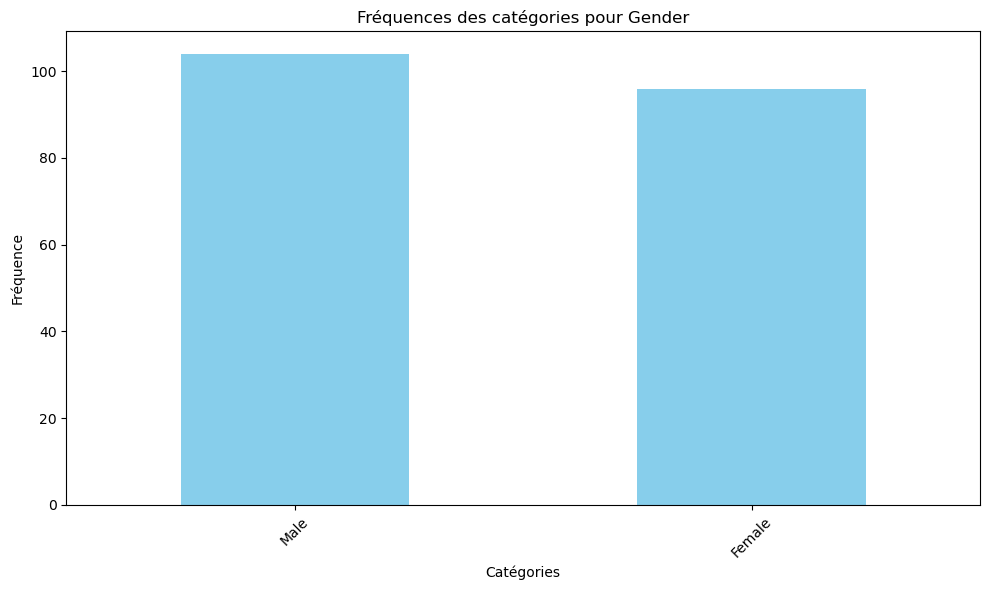

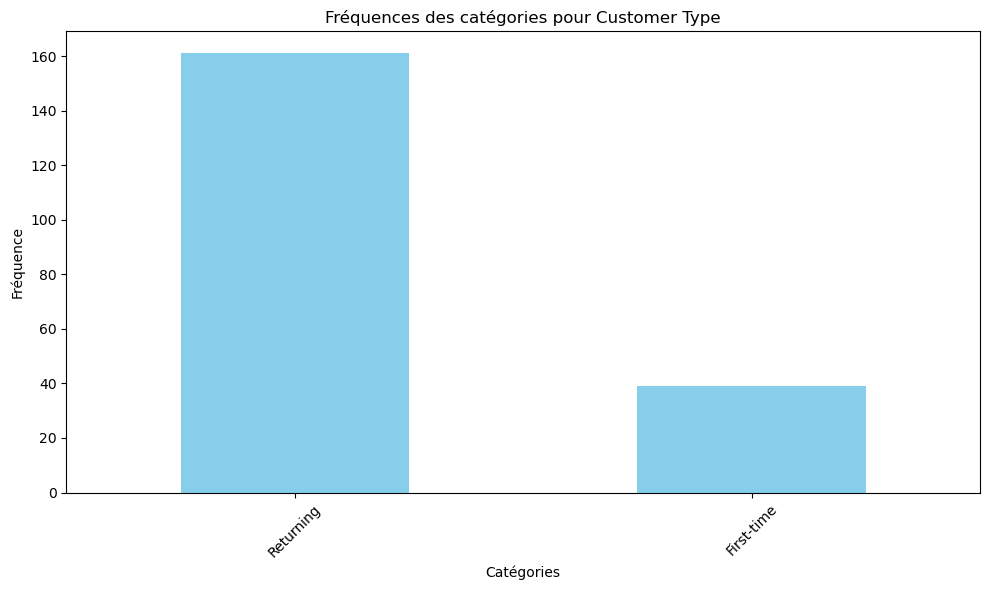

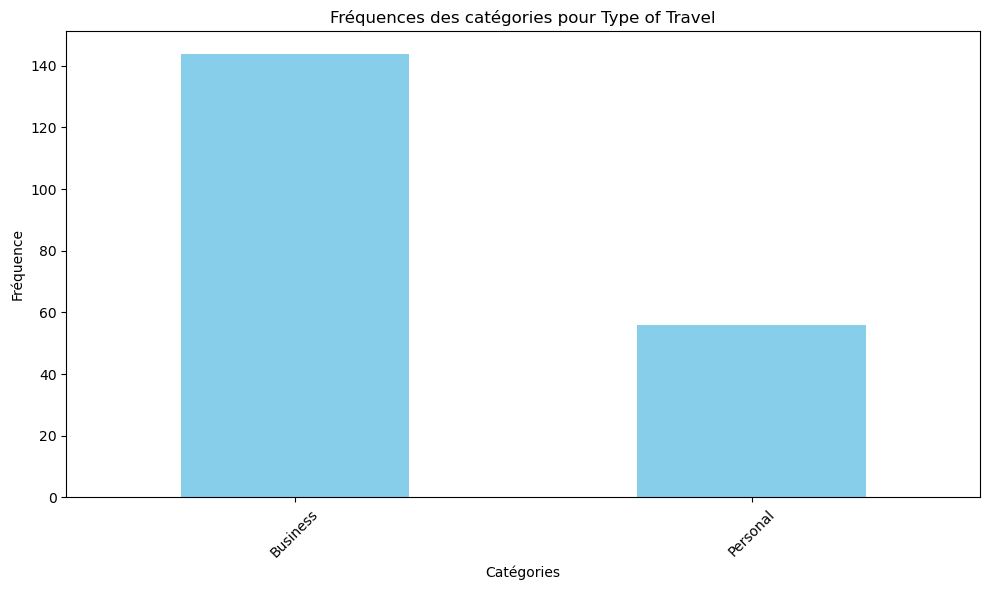

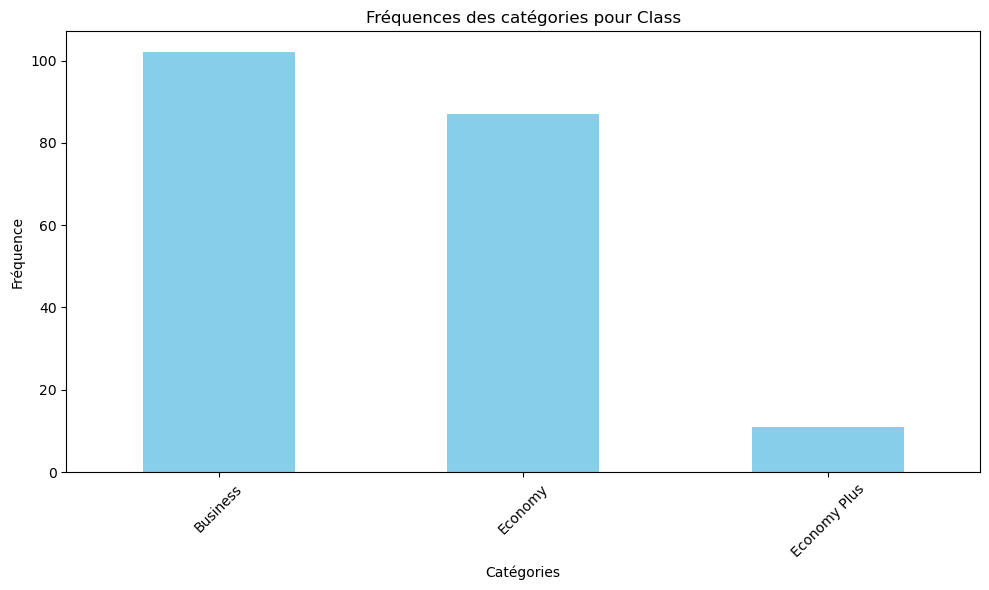

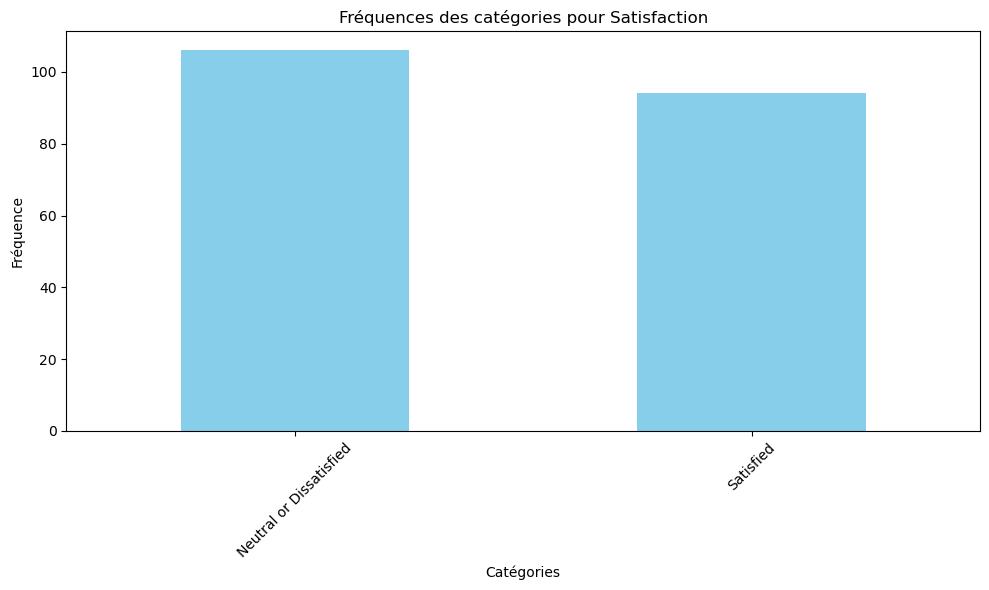

In [10]:
# Parcourir chaque variable catégorielle dans la liste variables_categorielles
for column in variables_categorielles:
    # Compter les occurrences de chaque catégorie
    category_counts = df[column].value_counts()

    # Créer un graphique à barres
    plt.figure(figsize=(10, 6))
    category_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Fréquences des catégories pour {column}')
    plt.xlabel('Catégories')
    plt.ylabel('Fréquence')
    plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe x pour une meilleure lisibilité
    plt.tight_layout()
    plt.show()

#  Bi-Variable Analysis

## Continuous & Continuous

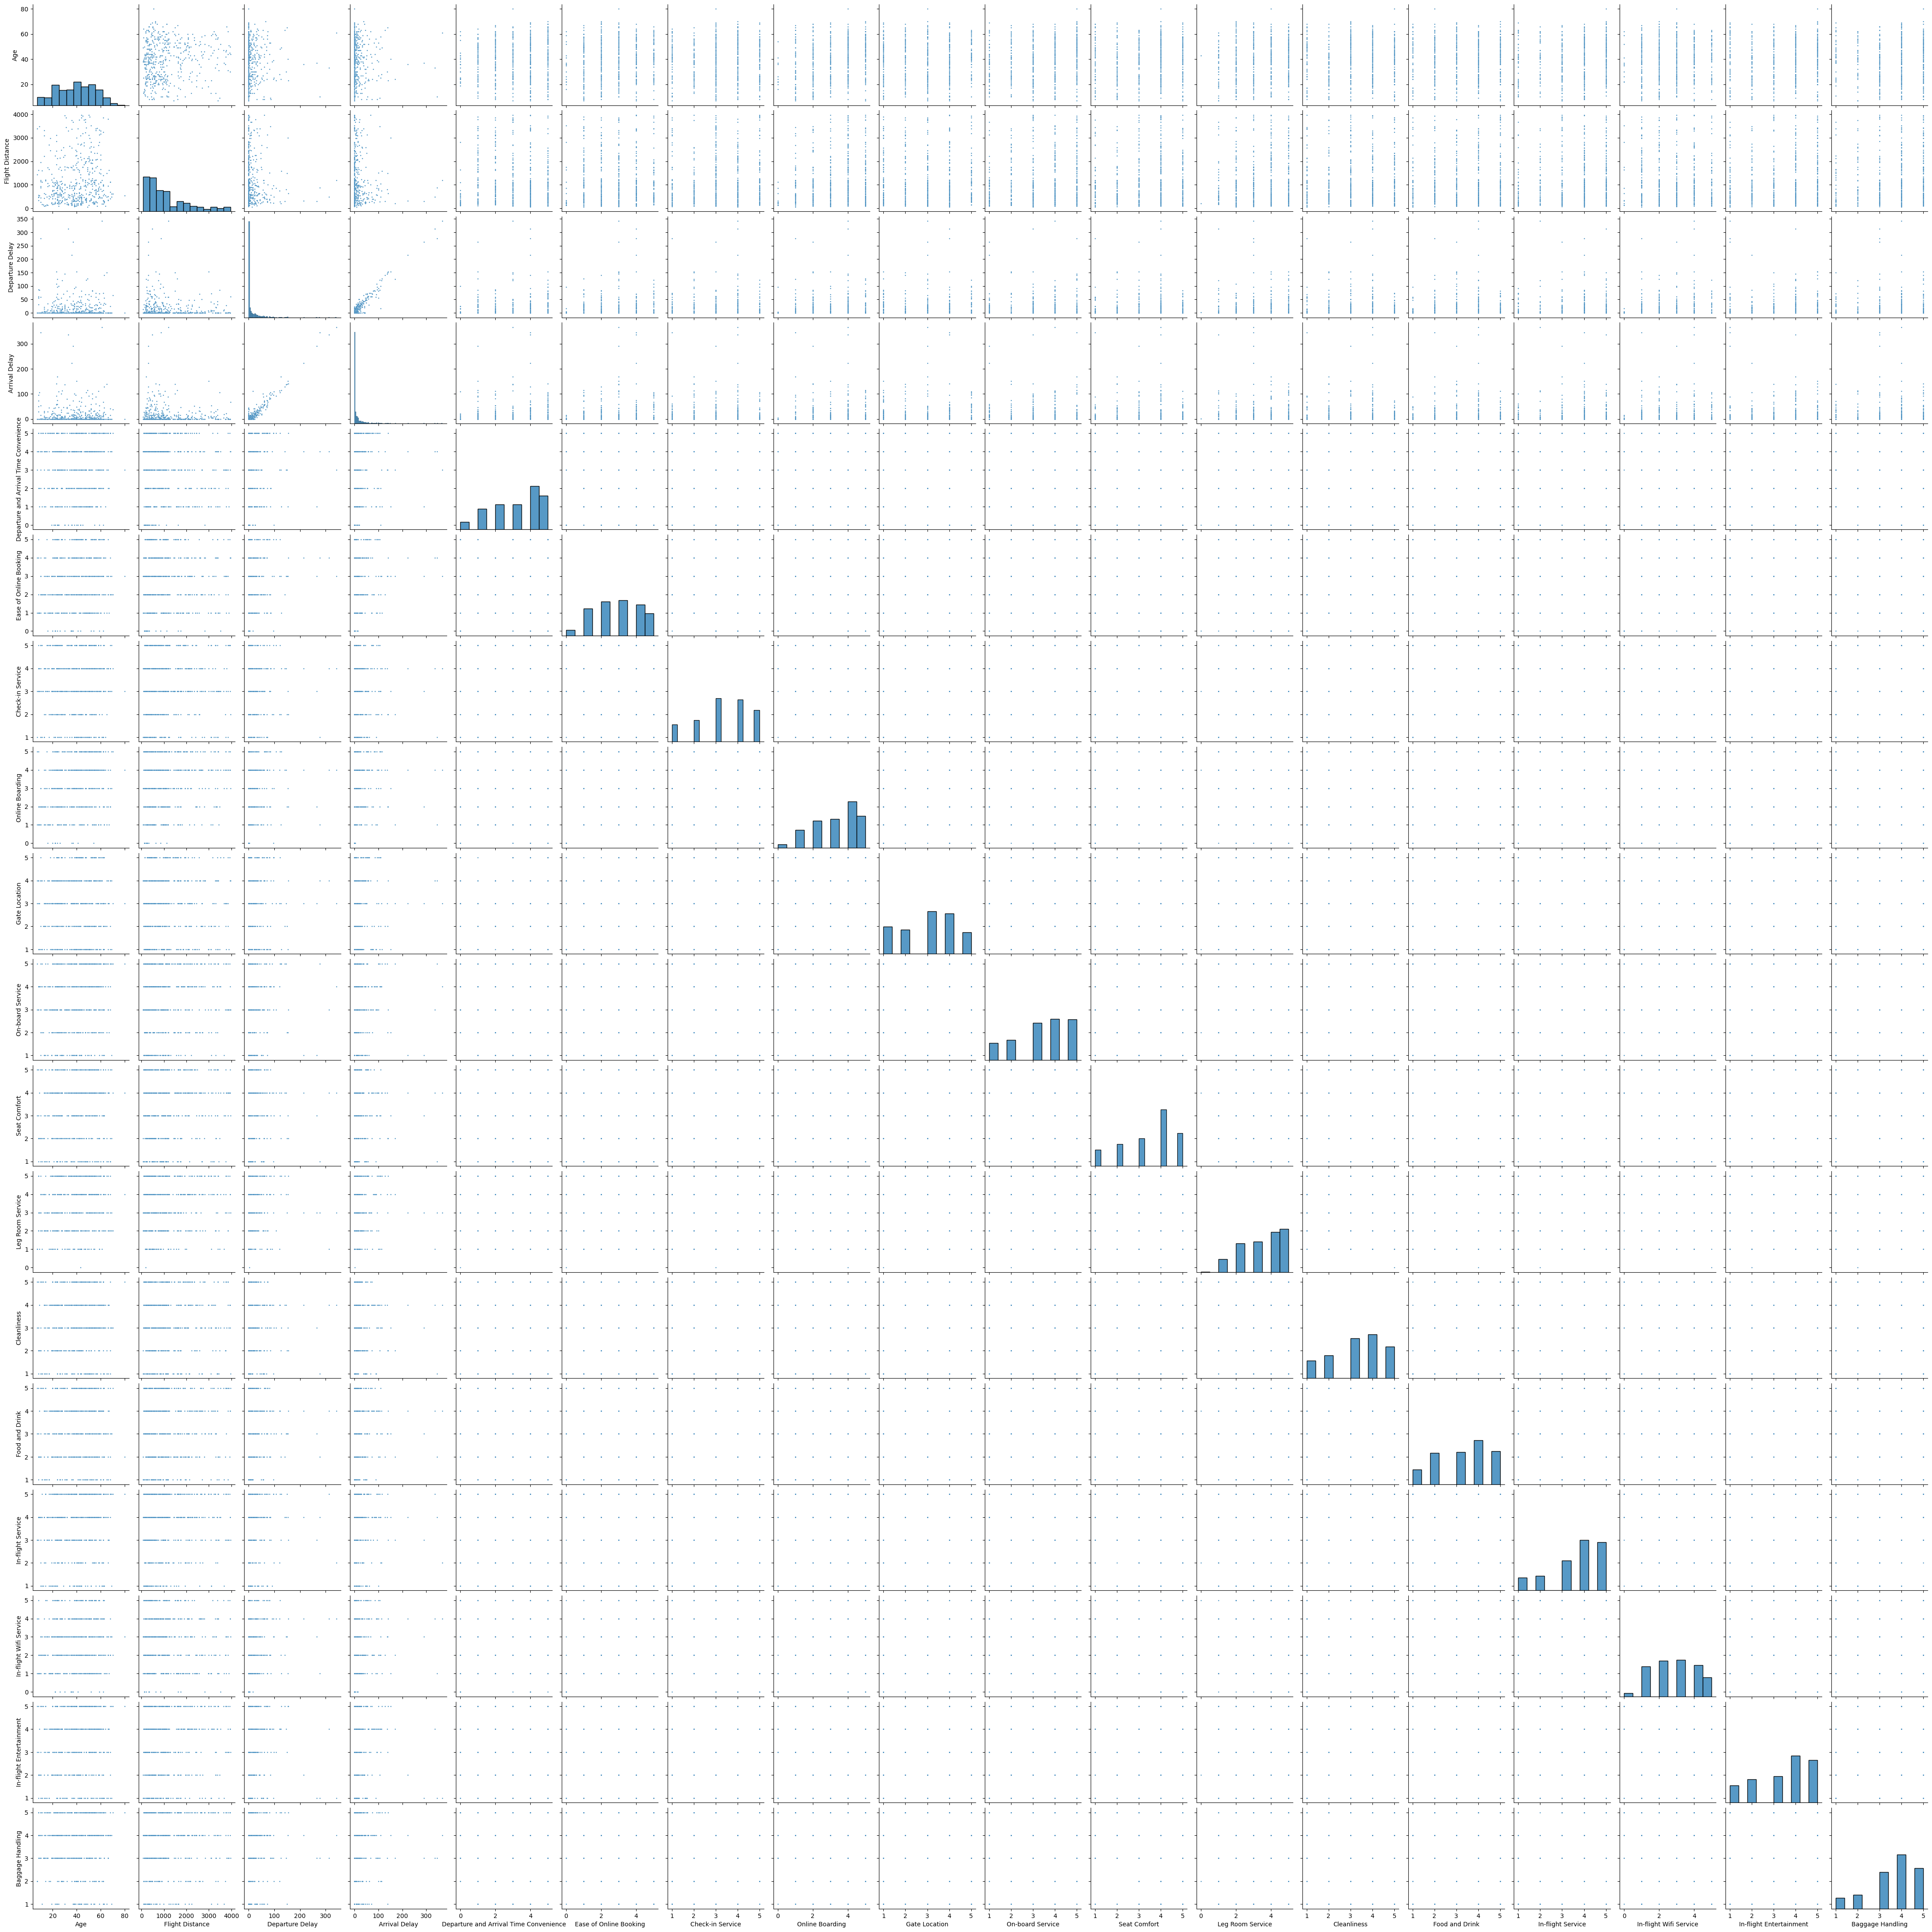

In [30]:
# Sélectionner les noms des colonnes des variables continues
continuous_vars = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

#Ce code peut prendre jsq 5min pour s executer meme si on a reduit la taille de dataset

# Utiliser sns.pairplot avec les noms des colonnes
sns.pairplot(df[continuous_vars], plot_kws={"s": 3})
plt.show()


## Categorial & Categorial 

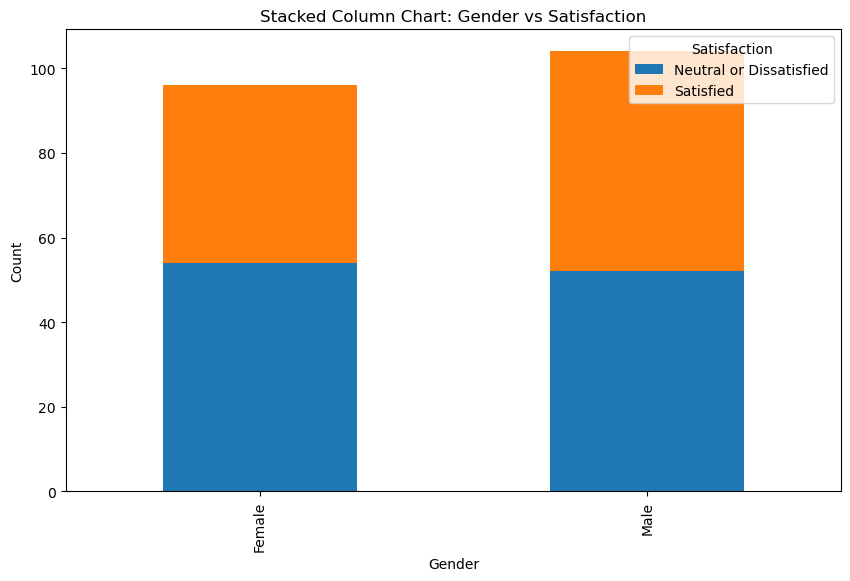

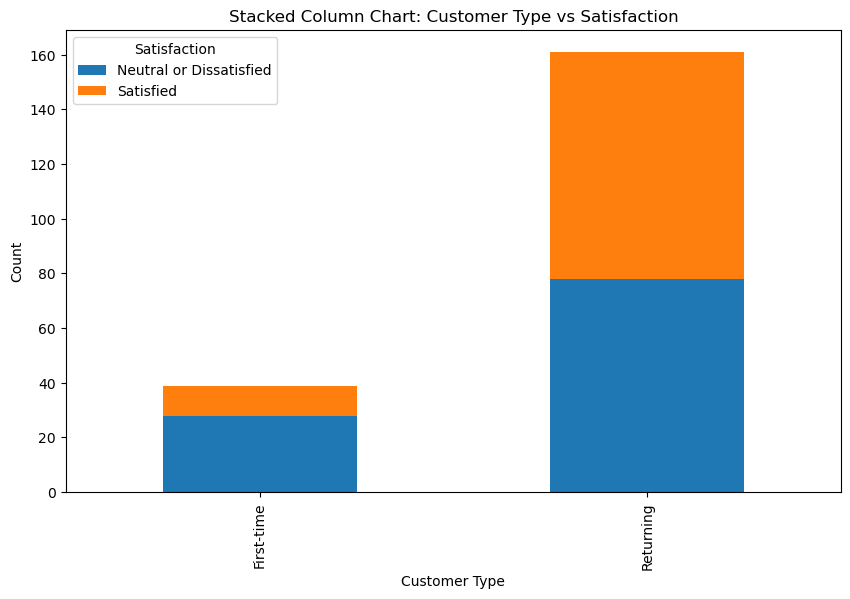

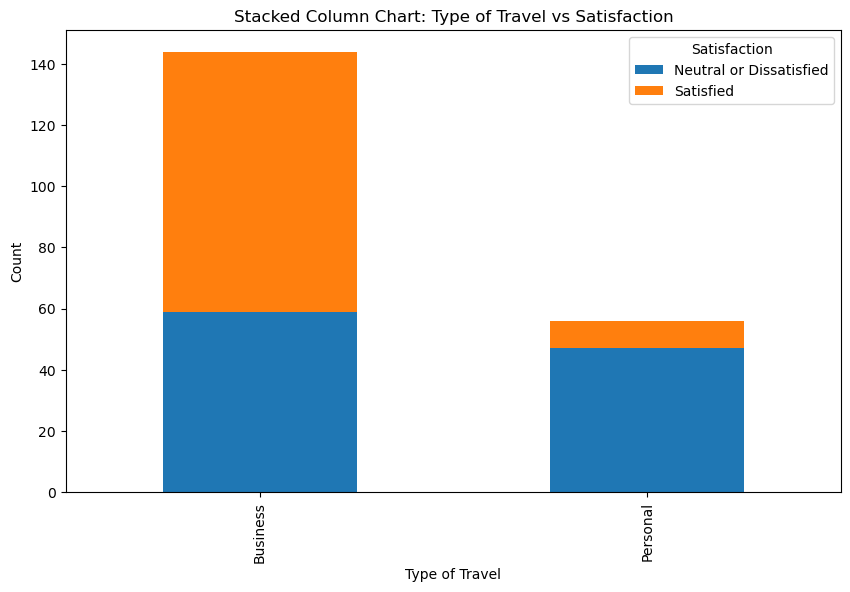

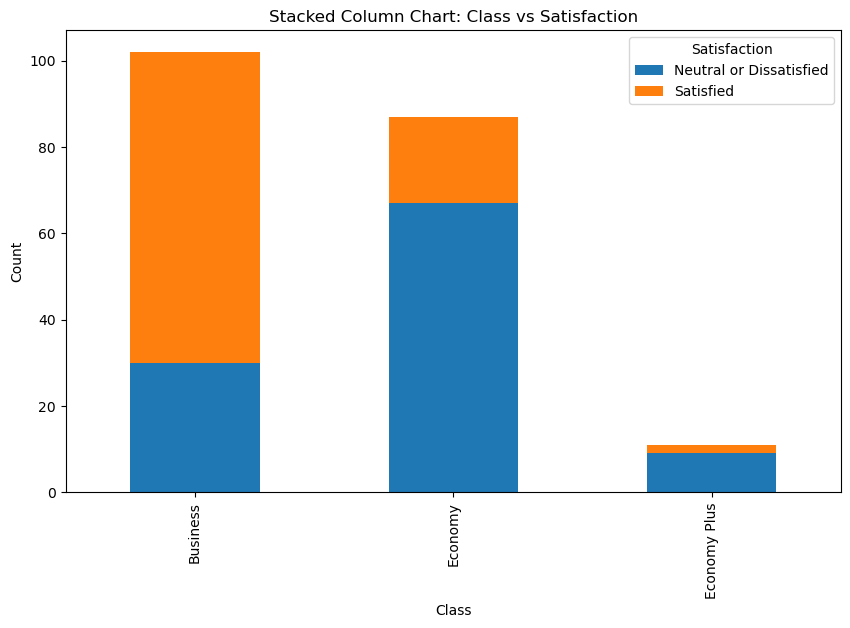

In [11]:
categorical_vars = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# Plotting stacked column charts for categorical variables vs Satisfaction
for var in categorical_vars:
    crosstab = pd.crosstab(df[var], df['Satisfaction'])
    crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Stacked Column Chart: {var} vs Satisfaction')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

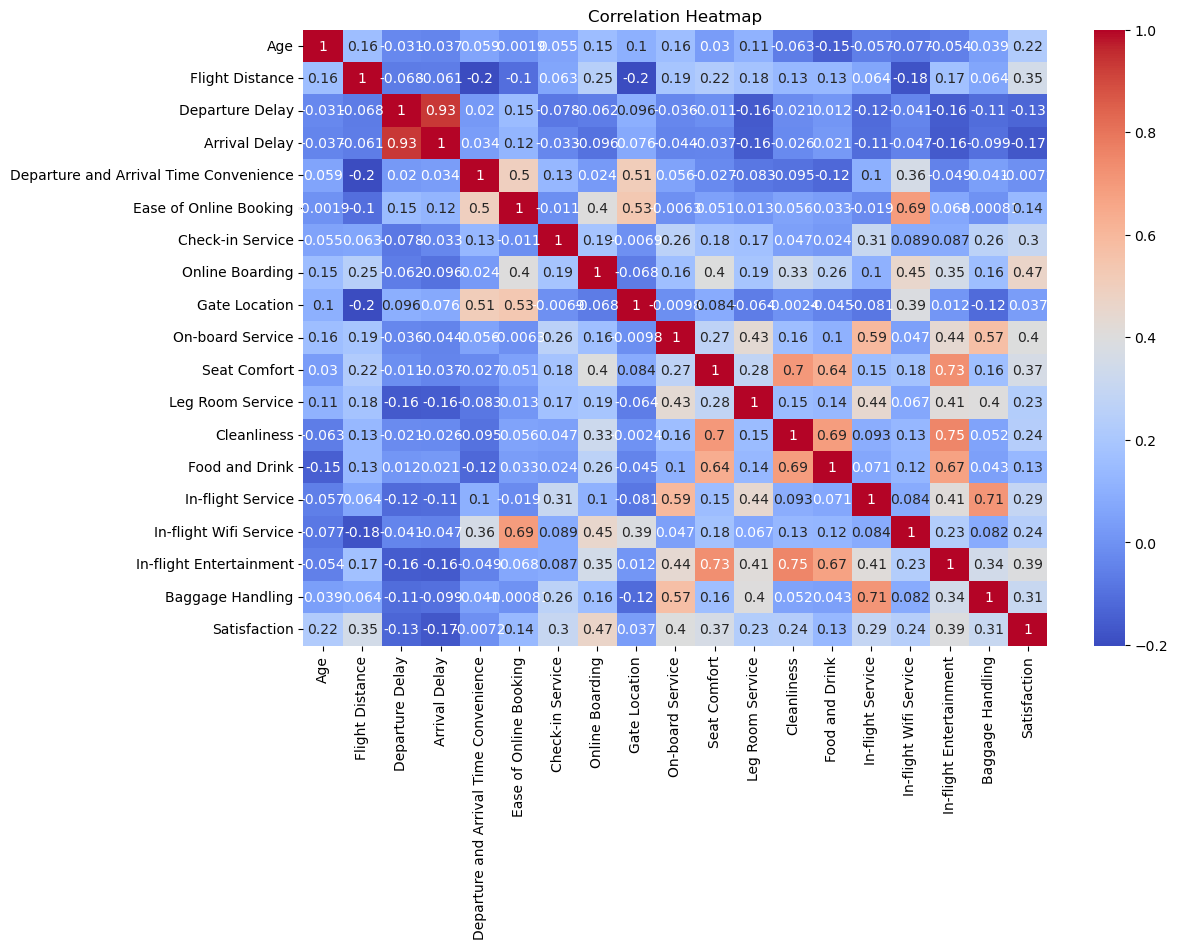

In [12]:
# Encode 'Satisfaction' as numerical if not already encoded
if df['Satisfaction'].dtype == 'object' or data['Satisfaction'].dtype.name == 'category':
    df['Satisfaction'] = df['Satisfaction'].astype('category').cat.codes
# Continuous variables
continuous_vars = ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay', 'Departure and Arrival Time Convenience', 
                   'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 
                   'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 
                   'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling']



# Calculate the correlation matrix
correlation_matrix = df[continuous_vars + ['Satisfaction']].corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

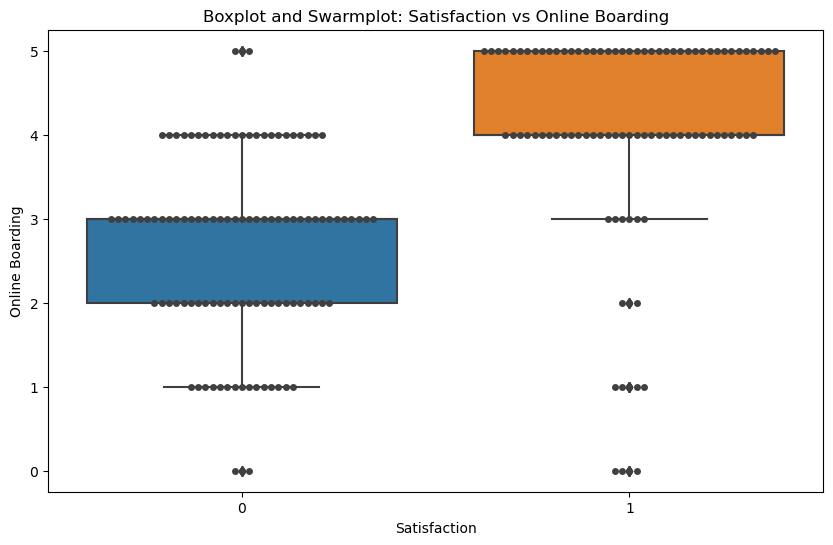

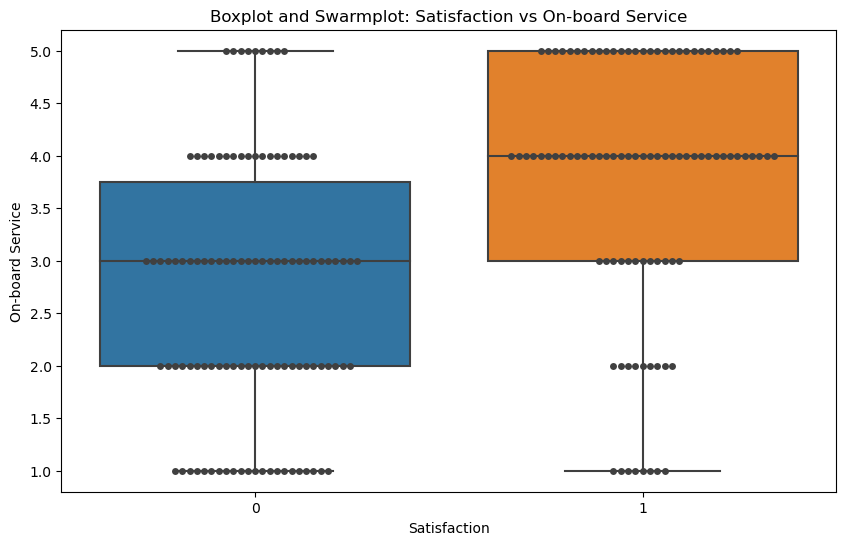

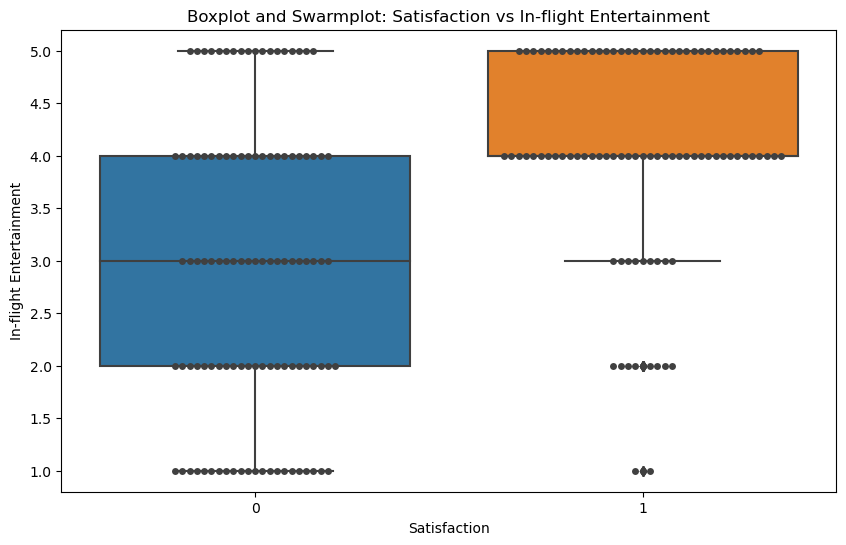

In [13]:
# Identify the most correlated variables with 'Satisfaction'
correlated_vars = correlation_matrix['Satisfaction'].drop('Satisfaction').sort_values(ascending=False).index

# Create boxplots combined with swarmplots for the top correlated variables
top_vars = correlated_vars[:3]  # Select top 3 most correlated variables

for var in top_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Satisfaction', y=var, data=df)
    sns.swarmplot(x='Satisfaction', y=var, data=df, color=".25")
    plt.title(f'Boxplot and Swarmplot: Satisfaction vs {var}')
    plt.show()

#  Detecting/Treating missing values

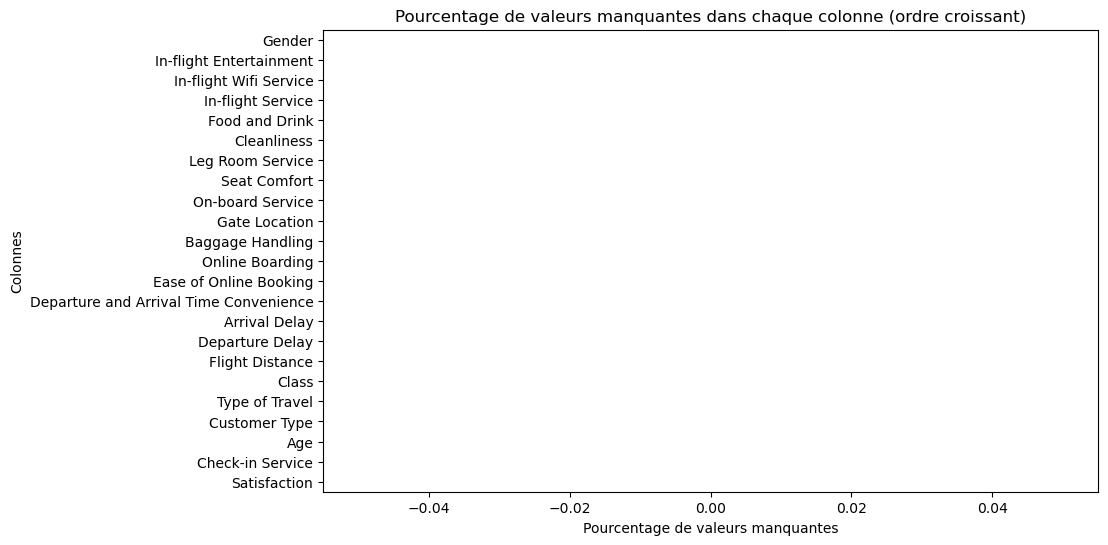

In [15]:
# Calculer le pourcentage de valeurs manquantes pour chaque colonne
pourcentage_valeurs_manquantes = df.isnull().mean() * 100

# Maintenant, vous pouvez trier et visualiser les valeurs manquantes
pourcentage_valeurs_manquantes_trié = pourcentage_valeurs_manquantes.sort_values()


plt.figure(figsize=(10, 6))
sns.barplot(x=pourcentage_valeurs_manquantes_trié, y=pourcentage_valeurs_manquantes_trié.index)
plt.title("Pourcentage de valeurs manquantes dans chaque colonne (ordre croissant)")
plt.xlabel("Pourcentage de valeurs manquantes")
plt.ylabel("Colonnes")
plt.show()


In [16]:
#Les valeurs manquantes
df.isnull().sum()

Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction                    

In [17]:
# Function to handle missing values
def handle_missing_values(df):
    # Threshold to determine "few" missing values (e.g., less than 5% of the rows)
    threshold = 0.05 * len(df)
    
    # Iterate through each column to detect and treat missing values
    for column in df.columns:
        missing_count = df[column].isnull().sum()
        
        # Case 1: Few missing values - delete these rows
        if missing_count > 0 and missing_count <= threshold:
            print(f"Deleting {missing_count} rows with missing values in column '{column}'")
            df = df.dropna(subset=[column])
        
        # Case 2: Many missing values - replace with median/mean/mode and add indicator column
        elif missing_count > threshold:
            print(f"Handling {missing_count} missing values in column '{column}' by replacing and adding indicator column")
            
            # Add indicator column for missing values
            df[column + '_missing'] = df[column].isnull().astype(int)
            
            # Replace missing values with median for numerical columns
            if df[column].dtype in ['float64', 'int64']:
                median_value = df[column].median()
                df[column].fillna(median_value, inplace=True)
            
            # Replace missing values with mode for categorical columns
            elif df[column].dtype == 'object':
                mode_value = df[column].mode()[0]
                df[column].fillna(mode_value, inplace=True)
    
    return df

In [18]:
# Handle missing values
df = handle_missing_values(df)

# Display the cleaned datafram
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,56,Returning,Business,Business,173,0,3,1,1,...,3,4,4,5,5,3,1,3,5,1
1,Male,59,Returning,Business,Business,309,48,55,2,2,...,3,2,3,4,3,3,3,3,3,0
2,Male,50,First-time,Business,Business,134,15,43,2,2,...,5,4,5,4,4,4,2,4,4,0
3,Male,45,Returning,Business,Business,806,0,20,5,5,...,4,5,4,5,2,4,5,4,4,1
4,Female,28,First-time,Business,Business,140,0,0,4,4,...,3,3,3,1,1,4,4,1,5,1


In [19]:
df.isnull().sum()

Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction                    

# Detecting / Treating outliers

In [20]:
# Function to detect and treat outliers
def detect_and_treat_outliers(df, columns, z_threshold=3):
    for column in columns:
        # Univariate analysis using boxplot
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot for {column}')
        plt.show()

        # Calculate Z-scores for outlier detection
        df['z_score'] = np.abs((df[column] - df[column].mean()) / df[column].std())
        
        # Identify outliers
        outliers = df[df['z_score'] > z_threshold]
        num_outliers = len(outliers)
        
        if num_outliers > 0:
            print(f"{num_outliers} outliers detected in column '{column}'")
            
            # If few outliers, remove them
            if num_outliers <= 0.05 * len(df):
                print(f"Deleting {num_outliers} outliers from column '{column}'")
                df = df[df['z_score'] <= z_threshold]
            else:
                print(f"Imputing {num_outliers} outliers in column '{column}'")
                # Replace outliers with median
                median_value = df[column].median()
                df.loc[df['z_score'] > z_threshold, column] = median_value
        
        # Remove the temporary 'z_score' column
        df.drop(columns=['z_score'], inplace=True)
        
    return df


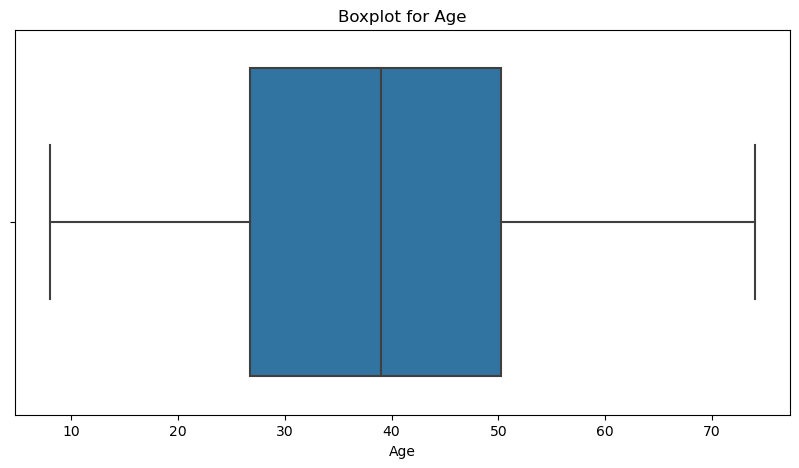

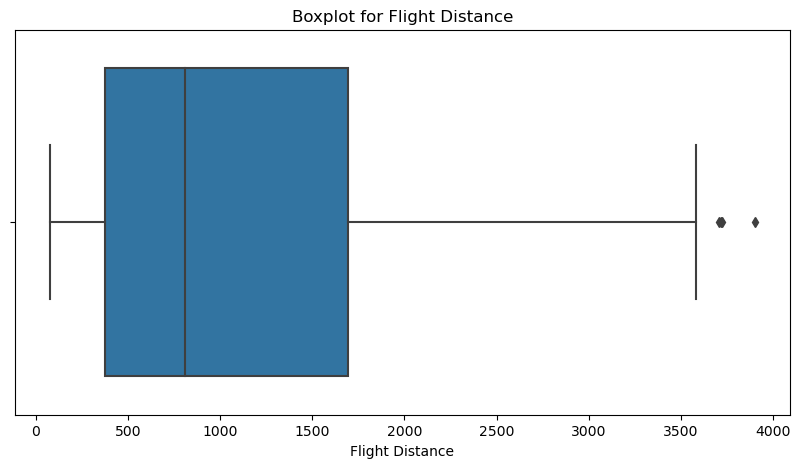

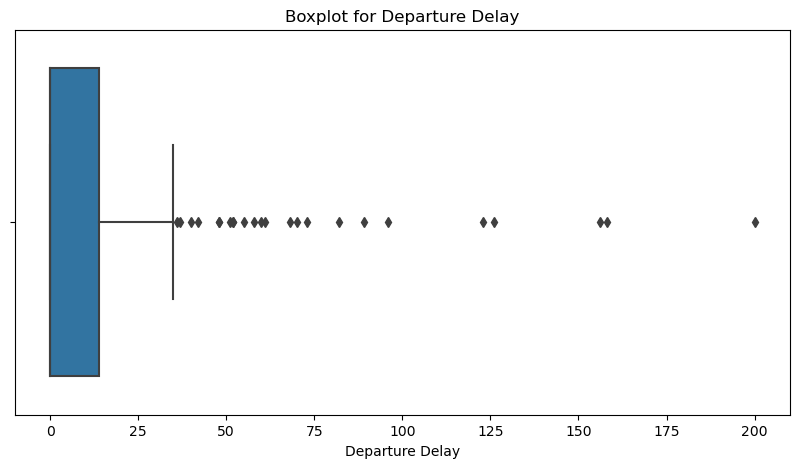

5 outliers detected in column 'Departure Delay'
Deleting 5 outliers from column 'Departure Delay'


C:\Users\dell\AppData\Local\Temp\ipykernel_1600\3460021134.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['z_score'], inplace=True)


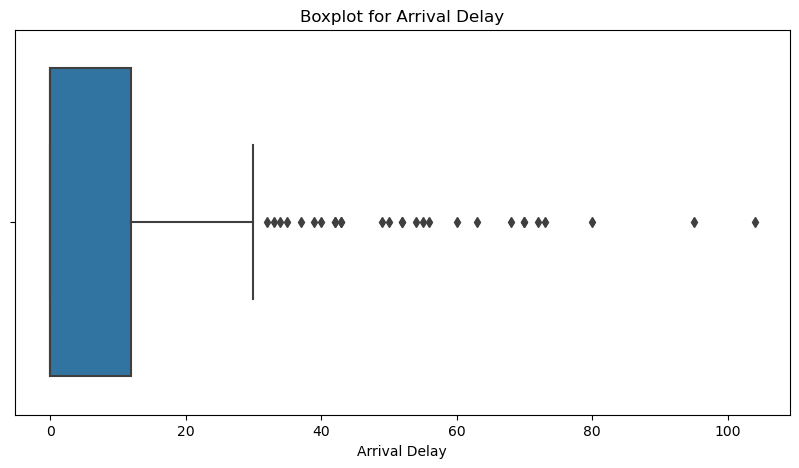

4 outliers detected in column 'Arrival Delay'
Deleting 4 outliers from column 'Arrival Delay'


C:\Users\dell\AppData\Local\Temp\ipykernel_1600\3460021134.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['z_score'] = np.abs((df[column] - df[column].mean()) / df[column].std())


,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,56,Returning,Business,Business,173,0,3,1,1,...,3,4,4,5,5,3,1,3,5,1
1,Male,59,Returning,Business,Business,309,48,55,2,2,...,3,2,3,4,3,3,3,3,3,0
2,Male,50,First-time,Business,Business,134,15,43,2,2,...,5,4,5,4,4,4,2,4,4,0
3,Male,45,Returning,Business,Business,806,0,20,5,5,...,4,5,4,5,2,4,5,4,4,1
4,Female,28,First-time,Business,Business,140,0,0,4,4,...,3,3,3,1,1,4,4,1,5,1


In [21]:
# Columns to analyze for outliers
columns_to_check = ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay']

# Detect and treat outliers
df = detect_and_treat_outliers(df, columns_to_check)

# Display the cleaned dataframe
df.head()

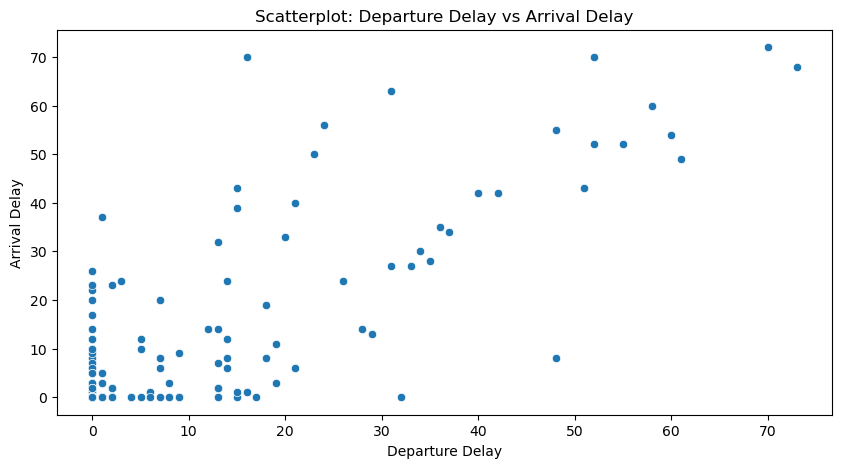

9 outliers detected in Departure Delay vs Arrival Delay scatterplot
Deleting 9 outliers from Departure Delay vs Arrival Delay scatterplot


C:\Users\dell\AppData\Local\Temp\ipykernel_1600\3293868949.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['z_score_x', 'z_score_y'], inplace=True)


In [22]:
def scatterplot_outliers(df, x_col, y_col, z_threshold=3):
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=x_col, y=y_col, data=df)
    plt.title(f'Scatterplot: {x_col} vs {y_col}')
    plt.show()

    # Calculate Z-scores for outlier detection in both columns
    df['z_score_x'] = np.abs((df[x_col] - df[x_col].mean()) / df[x_col].std())
    df['z_score_y'] = np.abs((df[y_col] - df[y_col].mean()) / df[y_col].std())
    
    # Identify outliers
    outliers = df[(df['z_score_x'] > z_threshold) | (df['z_score_y'] > z_threshold)]
    num_outliers = len(outliers)
    
    if num_outliers > 0:
        print(f"{num_outliers} outliers detected in {x_col} vs {y_col} scatterplot")
        
        # If few outliers, remove them
        if num_outliers <= 0.05 * len(df):
            print(f"Deleting {num_outliers} outliers from {x_col} vs {y_col} scatterplot")
            df = df[(df['z_score_x'] <= z_threshold) & (df['z_score_y'] <= z_threshold)]
        else:
            print(f"Imputing {num_outliers} outliers in {x_col} vs {y_col} scatterplot")
            # Replace outliers with median
            median_x = df[x_col].median()
            median_y = df[y_col].median()
            df.loc[df['z_score_x'] > z_threshold, x_col] = median_x
            df.loc[df['z_score_y'] > z_threshold, y_col] = median_y
    
    # Remove the temporary 'z_score' columns
    df.drop(columns=['z_score_x', 'z_score_y'], inplace=True)
    
    return df


df=scatterplot_outliers(df, 'Departure Delay', 'Arrival Delay')


# Feature Engineering

In [23]:
def feature_engineering(df):
    # Example 1: Creating a new feature by combining existing ones
    # Total delay combining departure and arrival delays
    df['Total_Delay'] = df['Departure Delay'] + df['Arrival Delay']
    
    # Example 2: Creating binary features based on existing conditions
    # Binary feature indicating whether the flight distance is long (> 1000 km)
    df['Long_Distance_Flight'] = (df['Flight Distance'] > 1000).astype(int)
    
    # Example 3: Creating interaction features between numerical variables
    # Interaction feature between online boarding and seat comfort
    df['Online_Boarding_Seat_Comfort'] = df['Online Boarding'] * df['Seat Comfort']
    
    # Example 4: Creating polynomial features
    # Age squared as a polynomial feature
    df['Age_Squared'] = df['Age'] ** 2
    
    return df


In [24]:
df = feature_engineering(df)

# Display the updated dataframe with new features
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Total_Delay,Long_Distance_Flight,Online_Boarding_Seat_Comfort,Age_Squared
0,Male,56,Returning,Business,Business,173,0,3,1,1,...,5,3,1,3,5,1,3,0,20,3136
1,Male,59,Returning,Business,Business,309,48,55,2,2,...,3,3,3,3,3,0,103,0,4,3481
2,Male,50,First-time,Business,Business,134,15,43,2,2,...,4,4,2,4,4,0,58,0,8,2500
3,Male,45,Returning,Business,Business,806,0,20,5,5,...,2,4,5,4,4,1,20,0,20,2025
4,Female,28,First-time,Business,Business,140,0,0,4,4,...,1,4,4,1,5,1,0,0,12,784


# Model selection

In [36]:
# one-hot encoding
columns_to_encode = ['Gender', 'Customer Type', 'Type of Travel','Class']
df_encoded = pd.get_dummies(df, columns=columns_to_encode, prefix=columns_to_encode, drop_first=True)

In [37]:
df_encoded.head()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,...,Satisfaction,Total_Delay,Long_Distance_Flight,Online_Boarding_Seat_Comfort,Age_Squared,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus
0,27,89,0,0.0,2,2,3,2,4,5,...,0,0.0,0,2,729,True,False,False,False,False
1,54,89,0,0.0,3,3,3,4,3,2,...,0,0.0,0,12,2916,True,True,False,False,False
2,47,482,9,0.0,2,2,5,4,2,4,...,1,9.0,0,20,2209,False,True,False,False,False
3,44,3876,0,0.0,2,2,3,5,2,5,...,1,0.0,1,25,1936,True,True,False,False,False
4,24,354,15,19.0,1,2,1,2,4,3,...,0,34.0,0,2,576,False,True,True,True,False


In [25]:
# Load libs
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

target = 'Satisfaction'
features = df.drop(columns=[target])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, df[target], test_size=0.2, random_state=42)

# Define preprocessing steps for categorical features
categorical_features = [col for col in X_train.columns if X_train[col].dtype == 'object']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocess data using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# Specify the models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Neural Network": MLPClassifier(max_iter=100),
    "k-NN": KNeighborsClassifier(n_neighbors=3)
}
# Function to evaluate a model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred)
    }
# Evaluate all models
results = {}
for name, model in models.items():
    # Create a Pipeline with preprocessing and the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    results[name] = evaluate_model(pipeline, X_train, X_test, y_train, y_test)

# Display the results
for name, metrics in results.items():
    print(f"Results for {name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.2f}")
    print("\n")


Results for Decision Tree:
accuracy: 0.76
precision: 0.73
recall: 0.84
f1_score: 0.78


Results for Random Forest:
accuracy: 0.81
precision: 0.88
recall: 0.74
f1_score: 0.80


Results for SVM:
accuracy: 0.65
precision: 0.88
recall: 0.37
f1_score: 0.52


Results for Neural Network:
accuracy: 0.51
precision: 0.51
recall: 1.00
f1_score: 0.68


Results for k-NN:
accuracy: 0.65
precision: 0.75
recall: 0.47
f1_score: 0.58




# Hyperparameter Tuning

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define the pipelines for each model
pipeline_decision_tree = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier())])
pipeline_random_forest = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier())])
pipeline_svm = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', SVC())])
pipeline_neural_network = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', MLPClassifier(max_iter=50))])

# Define hyperparameters grid for each model
param_grid_decision_tree = {
    'classifier__max_depth': [5, 10, 15, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

param_grid_random_forest = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [5, 10, 15, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

param_grid_svm = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': ['scale', 'auto'],
    'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

param_grid_neural_network = {
    'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'classifier__activation': ['relu', 'logistic', 'tanh'],
    'classifier__alpha': [0.0001, 0.001, 0.01, 0.1],
    'classifier__learning_rate': ['constant', 'invscaling', 'adaptive']
}

# Perform grid search or random search for each model
grid_search_decision_tree = GridSearchCV(estimator=pipeline_decision_tree, param_grid=param_grid_decision_tree, 
                                         cv=5, n_jobs=-1, scoring='accuracy')
random_search_random_forest = RandomizedSearchCV(estimator=pipeline_random_forest, param_distributions=param_grid_random_forest, 
                                                 n_iter=10, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_svm = GridSearchCV(estimator=pipeline_svm, param_grid=param_grid_svm, 
                               cv=5, n_jobs=-1, scoring='accuracy')
random_search_neural_network = RandomizedSearchCV(estimator=pipeline_neural_network, param_distributions=param_grid_neural_network, 
                                                  n_iter=10, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the grid search or random search models
grid_search_decision_tree.fit(X_train, y_train)
random_search_random_forest.fit(X_train, y_train)
grid_search_svm.fit(X_train, y_train)
random_search_neural_network.fit(X_train, y_train)

# Get the best hyperparameters for each model
best_params_decision_tree = grid_search_decision_tree.best_params_
best_params_random_forest = random_search_random_forest.best_params_
best_params_svm = grid_search_svm.best_params_
best_params_neural_network = random_search_neural_network.best_params_

# Evaluate the models with the best hyperparameters
best_model_decision_tree = grid_search_decision_tree.best_estimator_
best_model_random_forest = random_search_random_forest.best_estimator_
best_model_svm = grid_search_svm.best_estimator_
best_model_neural_network = random_search_neural_network.best_estimator_

# Evaluate all models with the best hyperparameters
results_best = {}
results_best["Decision Tree"] = evaluate_model(best_model_decision_tree, X_train, X_test, y_train, y_test)
results_best["Random Forest"] = evaluate_model(best_model_random_forest, X_train, X_test, y_train, y_test)
results_best["SVM"] = evaluate_model(best_model_svm, X_train, X_test, y_train, y_test)
results_best["Neural Network"] = evaluate_model(best_model_neural_network, X_train, X_test, y_train, y_test)

# Display the results with the best hyperparameters
for name, metrics in results_best.items():
    print(f"Results for {name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("\n")

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Results for Decision Tree:
accuracy: 0.7838
precision: 0.7391
recall: 0.8947
f1_score: 0.8095


Results for Random Forest:
accuracy: 0.8378
precision: 0.8824
recall: 0.7895
f1_score: 0.8333


Results for SVM:
accuracy: 0.7838
precision: 0.8235
recall: 0.7368
f1_score: 0.7778


Results for Neural Network:
accuracy: 0.6486
precision: 0.6250
recall: 0.7895
f1_score: 0.6977




C:\Users\dell\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


# Cross-Validation

In [26]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define the number of folds for cross-validation
n_folds = 5
cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Function to perform k-fold cross-validation and evaluate model performance
def evaluate_with_cross_val(model, X_train, y_train, cv):
    accuracy_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    precision_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='precision')
    recall_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='recall')
    f1_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')
    roc_auc_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
    
    return {
        "accuracy": accuracy_scores.mean(),
        "precision": precision_scores.mean(),
        "recall": recall_scores.mean(),
        "f1_score": f1_scores.mean(),
        "roc_auc": roc_auc_scores.mean()
    }

# Evaluate all models with k-fold cross-validation
results_with_cross_val = {}
for name, model in models.items():
    # Create a Pipeline with preprocessing and the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    results_with_cross_val[name] = evaluate_with_cross_val(pipeline, X_train, y_train, cv)

# Display the results with k-fold cross-validation
for name, metrics in results_with_cross_val.items():
    print(f"Results for {name} with k-fold cross-validation:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("\n")

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer

Results for Decision Tree with k-fold cross-validation:
accuracy: 0.7931
precision: 0.8155
recall: 0.8143
f1_score: 0.8219
roc_auc: 0.8214


Results for Random Forest with k-fold cross-validation:
accuracy: 0.8828
precision: 0.9124
recall: 0.8143
f1_score: 0.8737
roc_auc: 0.9538


Results for SVM with k-fold cross-validation:
accuracy: 0.6690
precision: 0.7292
recall: 0.5286
f1_score: 0.5913
roc_auc: 0.6905


Results for Neural Network with k-fold cross-validation:
accuracy: 0.5724
precision: 0.6073
recall: 0.4714
f1_score: 0.5254
roc_auc: 0.5857


Results for k-NN with k-fold cross-validation:
accuracy: 0.6000
precision: 0.5790
recall: 0.5714
f1_score: 0.5662
roc_auc: 0.5814




# Ensemble Methods

In [27]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.metrics import roc_auc_score

# Define ensemble models
ensemble_models = {
    "Bagging Classifier": BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10),#échantillonage avec remise
    "AdaBoost Classifier": AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10),#à chaque itération, on augmente le poids d'erreur,bach yrakaz 3liha
    "Stacking Classifier": StackingClassifier(estimators=[('rf', RandomForestClassifier()), ('svm', SVC())], final_estimator=LogisticRegression())
}

# Function to evaluate ensemble models
def evaluate_ensemble_models(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)
        results[name] = {"accuracy": accuracy, "precision": precision, "recall": recall, "f1_score": f1, "roc_auc": roc_auc}
    return results

# Evaluate ensemble models
results_ensemble = evaluate_ensemble_models(ensemble_models, X_train, X_test, y_train, y_test)

# Display the results for ensemble models
for name, metrics in results_ensemble.items():
    print(f"Results for {name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("\n")


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Results for Bagging Classifier:
accuracy: 0.8649
precision: 0.8889
recall: 0.8421
f1_score: 0.8649
roc_auc: 0.8655


Results for AdaBoost Classifier:
accuracy: 0.7838
precision: 0.7391
recall: 0.8947
f1_score: 0.8095
roc_auc: 0.7807


Results for Stacking Classifier:
accuracy: 0.8108
precision: 0.8750
recall: 0.7368
f1_score: 0.8000
roc_auc: 0.8129




# Comparison and Analysis

In [36]:
# Combining the results into a single dictionary
#combined_results = results_ensemble
combined_results = {**results_best, **results_with_cross_val, **results_ensemble}


# Analysis of the different models
print("Model Analysis:")
for name, metrics in combined_results.items():
    strengths = []
    weaknesses = []
    
    if metrics['accuracy'] > 0.8:
        strengths.append('High accuracy')
    else:
        weaknesses.append('Low accuracy')
    
    if metrics['precision'] > 0.8:
        strengths.append('High precision')
    else:
        weaknesses.append('Low precision')
    
    if metrics['recall'] > 0.8:
        strengths.append('High recall')
    else:
        weaknesses.append('Low recall')
    
    if metrics['f1_score'] > 0.8:
        strengths.append('High F1 score')
    else:
        weaknesses.append('Low F1 score')
    
    print(f"{name}:")
    print(f"Strengths: {', '.join(strengths)}")
    print(f"Weaknesses: {', '.join(weaknesses)}")
    print("\n")


Model Analysis:
Decision Tree:
Strengths: High precision, High recall, High F1 score
Weaknesses: Low accuracy


Random Forest:
Strengths: High accuracy, High precision, High recall, High F1 score
Weaknesses: 


SVM:
Strengths: 
Weaknesses: Low accuracy, Low precision, Low recall, Low F1 score


Neural Network:
Strengths: 
Weaknesses: Low accuracy, Low precision, Low recall, Low F1 score


k-NN:
Strengths: 
Weaknesses: Low accuracy, Low precision, Low recall, Low F1 score


Bagging Classifier:
Strengths: High accuracy, High precision, High recall, High F1 score
Weaknesses: 


AdaBoost Classifier:
Strengths: High recall, High F1 score
Weaknesses: Low accuracy, Low precision


Stacking Classifier:
Strengths: High accuracy, High precision
Weaknesses: Low recall, Low F1 score


